##### 读取数据

In [1]:
import pandas as pd
station_info = pd.read_csv("stationinfo.csv")
station_Aws = pd.read_csv("station_Aws.csv")
station_Mws = pd.read_csv("station_Mws.csv")
station_all = pd.concat([station_Aws,station_Mws])

grouped = station_all.groupby('IIiii')
station_all_IIiii = grouped.mean()
# station_all_IIiii #451
station_info

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (11,14,18,20,23,28,30,41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Unnamed: 0,IIiii,StationName,ItemList,IP,NNnn,EEEee,lon,lat,Height,...,Village,Country,Address0,Type,Note,Address,TZAir,ShareF,Property,Index0
0,0,58653,括苍山,PTURF,255.0.0.0,2849,12055,120.922200,28.809720,13834,...,NaN,临海市,临海市括苍山米筛廊山顶(山地),区域站,中尺度,-,0.0,SHARED_VER,"高山,YA",R
1,1,58661,椒江口,PTURFV,255.0.0.0,2840,12131,121.510800,28.662500,40,...,NaN,椒江区,椒江区椒江口台风地标(平原),区域站,中尺度,-,1.0,SHARED_VER,沿海航线TZW,RF
2,2,58662,牛山,PTURFV,255.0.0.0,2901,12142,121.705600,29.013100,610,...,NaN,三门县,三门县浦坝港镇浬浦牛山岛上(岛屿),区域站,中尺度,-,1.0,SHARED_VER,沿海航线,RFH
3,3,58663,东矶,PTURFV,255.0.0.0,2843,12155,121.915600,28.718890,970,...,NaN,临海市,临海市上盘镇东矶岛山上(岛屿),区域站,强风站,-,1.0,SHARED_VER,海岛航线,RF
4,4,58668,披山,PTURFV,255.0.0.0,2806,12131,121.520000,28.095830,1220,...,NaN,玉环市,玉环市披山岛(岛屿),区域站,中尺度,-,1.0,SHARED_VER,海岛航线,F
5,5,58669,石塘,PTURFV,255.0.0.0,2816,12137,121.616252,28.260317,750,...,NaN,温岭市,温岭市石塘镇小山头(岛屿),区域站,中尺度,-,1.0,SHARED_VER,沿海航线,RFH
6,6,K8001,赤龙,PTURF,255.0.0.0,2839,12125,121.418900,28.654720,280,...,NaN,椒江区,台州市气象局大院(平原),区域站,中尺度,-,0.0,SHARED_VER,NaN,R
7,7,K8003,绿心,PTURF,255.0.0.0,2838,12121,121.352100,28.638986,2060,...,NaN,椒江区,椒江区葭沚街道井马村北侧山上,区域站,中尺度,-,0.0,NaN,NaN,NaN
8,8,K8010,椒江口BD,PTURFV,255.0.0.0,2840,12131,121.510800,28.662500,40,...,NaN,椒江区,椒江区椒江口台风地标(平原),区域站,中尺度,-,0.0,NaN,NaN,NaN
9,9,K8011,绿心BD,PTURF,255.0.0.0,2838,12121,121.352100,28.628990,1870,...,NaN,椒江区,台州市经济开发区井马水库北侧山上-井马村(丘陵),区域站,中尺度,-,0.0,NaN,NaN,NaN


# 核心数据库sql语句

In [17]:
#数据库数据读取
"select lat,b.lon,b.IIiii,RR from TAB_Mws2019 as a left join TAB_StationInfo as b on a.IIiii=b.IIiii where\
(b.IIiii in (select IIiii from TAB_StationInfo where(City = '台州') and tTime between '2019-08-09 23:00' and '2019-08-10 06:00'))"


"select lat,b.lon,b.IIiii,RR from TAB_Mws2019 as a left join TAB_StationInfo as b on a.IIiii=b.IIiii where(b.IIiii in (select IIiii from TAB_StationInfo where(City = '台州') and tTime between '2019-08-09 23:00' and '2019-08-10 06:00'))"

In [ ]:
select * from TAB_Mws2019 where(tTime between '2019-08-09 23:00' and '2019-08-10 06:00')

In [1]:
import pymssql 
import pandas as pd

## sqlserver
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

sql_location = "select b.StationName,b.county,b.Town,b.lat,b.lon,b.IIiii,tTime,dFy,fFy,T,Tx,Tn,VV,RR from TAB_Mws2022 as a left join TAB_StationInfo as b on a.IIiii=b.IIiii where\
(b.IIiii in (select IIiii from TAB_StationInfo where(City = '台州') and tTime between '2022-01-25 20:00' and '2022-02-10 08:00'))"


df_location = pd.read_sql(sql_location , con=conn)
df_location.to_csv("Mws_test.csv")

In [2]:
import pymssql 
import pandas as pd

## sqlserver
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

sql_location = "select b.StationName,b.county,b.Town,b.lat,b.lon,b.IIiii,tTime,dFy,fFy,T,Tx,Tn,VV,RR from TAB_Aws2022 as a left join TAB_StationInfo as b on a.IIiii=b.IIiii where\
(b.IIiii in (select IIiii from TAB_StationInfo where(City = '台州') and tTime between '2022-01-25 20:00' and '2022-02-10 08:00'))"


df_location = pd.read_sql(sql_location , con=conn)
df_location.to_csv("Aws_test.csv")

# 数据处理过程


In [ ]:
import pandas as pd
import numpy as np
%time
station_Mws = pd.read_csv("Mws2022.csv", keep_default_na=-9999)
station_Aws = pd.read_csv("Aws2022.csv", keep_default_na=-9999)
station_all = pd.concat([station_Aws,station_Mws])

grouped = station_all.groupby('IIiii')
# station_all_IIiii = grouped.mean()
# print(station_all_IIiii)
# station_all_IIiii #451

# 处理基本数据

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# 数据1 单站总时间的统计数据 station_dot_all {}
# 数据2 单站聚合时间数据数据 station_dot_comput {}
# 数据3 市县的排序数据 station_county_comput {}
# 数据4 统计站点分级数据 station_event_count {}

station_IIiii = station_all['IIiii']

station_name = station_IIiii.drop_duplicates().to_list()

#data = grouped.get_group(58667)
# station_dot_all  = []
# for i in station_name:
#     dic = {}
#     dic['station_name'] = str(i)
#     dic['data'] =  grouped.get_group(i)
#     station_dot_all.append(dic)
station_dot_all = {}    
for i in station_name:    
    station_dot_all[str(i)] =  grouped.get_group(i)

station_dot_comput = {}    

for i in station_name:  
    data= grouped.get_group(i)
    data['VV'].replace(-9999,np.nan,inplace=True)
    data['RR'].replace(-9999,np.nan,inplace=True)
    data['Tn'].replace(-9999,np.nan,inplace=True)
    dic = {}
    dic['IIiii'] = data['IIiii'].iloc[0]
    dic['StationName'] = data['StationName'].iloc[0]
    dic['county'] = data['county'].iloc[0]
    dic['lat'] = data['lat'].iloc[0]
    dic['lon'] = data['lon'].iloc[0]
    dic['Town'] = data['Town'].iloc[0]
    dic['fFy'] = data['fFy'].max()           
    dic['dFy'] = data[data['fFy']== data['fFy'].max()]['dFy'].iloc[0]
    dic['T'] = data['T'].tolist()
    dic['Tx'] = data['Tx'].max()/10.0
    dic['Tn'] = data['Tn'].min()/10.0
    dic['VV'] = data['VV'].min()
    dic['RR'] = data['RR'].sum()
    # 整合
    station_dot_comput[str(i)] = dic

# 按照市县的排序数据
grouped_county = station_all.groupby('county')
# grouped_county.get_group('玉环市')
# print(grouped_county.size().index[0])

station_county = {}    
for i in grouped_county.size().index:
#     print(i)
    station_county[i] =  grouped_county.get_group(i)

station_county_comput = [] 
for i in grouped_county.size().index:  
    data= grouped_county.get_group(i)
    data['VV'].replace(-9999,np.nan,inplace=True)
    data['RR'].replace(-9999,np.nan,inplace=True)
    data['Tn'].replace(-9999,np.nan,inplace=True)
    dic = {}
    dic['county'] = str(i)
    dic['RR'] = data['RR'].mean()
    dic['Tx'] = data['Tx'].max()
    dic['Tn'] = data['Tn'].min()
    dic['VV'] = data['VV'].min()
    dic['fFy'] = data['fFy'].max()
    dic['dFy'] = data[data['fFy']== data['fFy'].max()]['dFy'].iloc[0]    
    print(dic)
    station_county_comput.append(dic)

# 统计实际数据分级（降水、能见度）
station_event_count = {"RR":[],"VV":[]}
count_vv_red = []
count_vv_orange = []
count_vv_yellow = []
count_vv_blue = []
vv_station_info = {"name":[],"lat":[],"lon":[],"value":[]}
for i in station_name:
    vv_data = station_dot_comput[str(i)]['VV']        
    if vv_data>500 and vv_data<1000:
        count_vv_blue.append(1)
        vv_station_info['name'].append(station_dot_comput[str(i)]['IIiii']) 
        vv_station_info['lat'].append(station_dot_comput[str(i)]['lat']) 
        vv_station_info['lon'].append(station_dot_comput[str(i)]['lon']) 
        vv_station_info['value'].append(station_dot_comput[str(i)]['VV']) 
    elif vv_data<500 and vv_data >250:
        count_vv_yellow.append(1)
        vv_station_info['name'].append(station_dot_comput[str(i)]['IIiii']) 
        vv_station_info['lat'].append(station_dot_comput[str(i)]['lat']) 
        vv_station_info['lon'].append(station_dot_comput[str(i)]['lon']) 
        vv_station_info['value'].append(station_dot_comput[str(i)]['VV']) 
    elif vv_data<250 and vv_data >50:
        count_vv_orange.append(1)
        vv_station_info['name'].append(station_dot_comput[str(i)]['IIiii']) 
        vv_station_info['lat'].append(station_dot_comput[str(i)]['lat']) 
        vv_station_info['lon'].append(station_dot_comput[str(i)]['lon']) 
        vv_station_info['value'].append(station_dot_comput[str(i)]['VV']) 
    elif vv_data<50 and vv_data >0:
        count_vv_red.append(1)
        vv_station_info['name'].append(station_dot_comput[str(i)]['IIiii']) 
        vv_station_info['lat'].append(station_dot_comput[str(i)]['lat']) 
        vv_station_info['lon'].append(station_dot_comput[str(i)]['lon']) 
        vv_station_info['value'].append(station_dot_comput[str(i)]['VV']) 
    elif vv_data>1000:
        vv_station_info['name'].append(station_dot_comput[str(i)]['IIiii']) 
        vv_station_info['lat'].append(station_dot_comput[str(i)]['lat']) 
        vv_station_info['lon'].append(station_dot_comput[str(i)]['lon']) 
        vv_station_info['value'].append(station_dot_comput[str(i)]['VV']) 
        
station_event_count = {"RR":[],"VV":{"red":sum(count_vv_red),"blue":sum(count_vv_blue),"yellow":sum(count_vv_yellow),"orange":sum(count_vv_orange)}}
print(vv_station_info)
#     print(i)
#     station_dot_comput[str(i)]['vv'].apply(lambda x:1 if x>= 4 else 0)


# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ## 1 计算面雨量

# rr_county = station_all.groupby(station_all['county'])
# rr_county_mean = rr_county['RR'].mean()

# ## 2. 绘制降水插值计算

# ## 3. 统计降水量级

# ## 4. 单站累计降水排序

# ## 5.统计代表站降水随时间变化

# ## 单站数据调出

# # 获取站名



# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# # 气温模块的数据编写
# 

nation_station = ['58660','58666','K8505','K8206','58665','58559','58655','K8271','58662','58653']
temp_scatter_list = ['58559','K8705','K8706','58652','K8903','58568','K8818','58662','K8821','58660','58653','K8609','K8505','58667','58664','K8413','58655','K8282','K8217','K8201','K8301','58665']
# 散点数据
tmp_min_scatter = []
tmp_max_scatter = []
for i in temp_scatter_list:
#     print(i)
    dic_temp_max = {"value":[],"url":"",}
    dic_temp_max['value'].append(station_dot_comput[i]['lon'])
    dic_temp_max['value'].append(station_dot_comput[i]['lat'])
    dic_temp_max['value'].append(station_dot_comput[i]['Tx'])
    dic_temp_max['url'] ="station/"+str(station_dot_comput[i]['IIiii'])
    dic_temp_max['name'] = str(station_dot_comput[i]['StationName'])
    dic_temp_min = {"value":[],"url":""}
    dic_temp_min['value'].append(station_dot_comput[i]['lon'])
    dic_temp_min['value'].append(station_dot_comput[i]['lat'])
    dic_temp_min['value'].append(station_dot_comput[i]['Tn'])
    dic_temp_min['url'] ="station/"+str(station_dot_comput[i]['IIiii'])
    dic_temp_min['name'] = str(station_dot_comput[i]['StationName'])
    tmp_max_scatter.append(dic_temp_max)
    tmp_min_scatter.append(dic_temp_min)
    #print(tmp_max_scatter)
# 柱状图数据
tmp_station_bar = []
tmp_station_bar.append(['product', '最高气温','最低气温'])
for i in nation_station:
    tmp_station_bar.append([station_dot_comput[i]['StationName'], station_dot_comput[i]['Tx'],station_dot_comput[i]['Tn']])
    
# 面数据
tmp_max_County = []
tmp_min_County = []
for i in station_county_comput:
    tmp_max_County.append({"name":i['county'],"value":i['Tx']})
    tmp_min_County.append({"name":i['county'],"value":i['Tn']})
    
    
# #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# # 能见度模块的数据编写
%%time


# 数据处理class版
1. 初始化处理数据计算区域（county）、所有站(IIIii)、代表站数据(station)
2. 方法
   1. 面数据
      1. max
      2. sum
      3. min
      4. rank
   2. 代表站数据
      1. RR、Rmax
      2. Tmin、Tmin
   3. 单站数据
      1. scatter
      2. image
      3. sort
      4. timeserlses
3. 返回（所有数据）


In [6]:
import pandas as pd
import numpy as np
sql = 'test'  

class sql_data:
    def __init__(self, sql):
        self.sql = sql# 传进来的参数
        station_Mws = pd.read_csv("Mws2022.csv")
        station_Aws = pd.read_csv("Aws2022.csv")
        self.station_all = pd.concat([station_Aws,station_Mws])
        print(self.sql)
    

a =  sql_data(sql)   

test


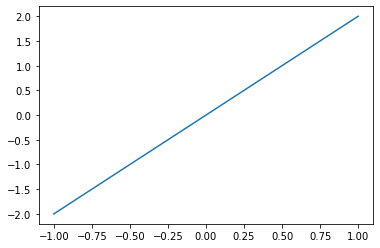

In [3]:
%matplotlib inline

# %matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
# from IPython.display import display
x = np.linspace(-1,1,50)#从(-1,1)均匀取50个点
y = 2 * x
 
plt.plot(x,y)
plt.show()
